In [ ]:
#The databases used in this notebook are available in: https://www.kaggle.com/datasets/jonbown/simpsons-episodes-2016

In [2]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#import data base of Simpsons 
df1 = pd.read_csv('/content/drive/MyDrive/Simpsons/ViewsByTitle.csv')

In [4]:
#order episodes by views (top 10)
df1.sort_values(by = ['views_title'], ascending = False, ignore_index = True)[0:10]

,titles,views_title,imdb_rating
0,Simpsons Roasting on an Open Fire,171408.0,8.2
1,Treehouse of Horror,130282.0,8.2
2,Treehouse of Horror V,119295.0,9.0
3,Treehouse of Horror VI,110342.0,8.5
4,Treehouse of Horror IV,110251.0,8.7
5,Treehouse of Horror III,108171.0,8.4
6,Treehouse of Horror II,103012.0,8.2
7,Treehouse of Horror VII,102077.0,8.3
8,Bart the Genius,91423.0,7.8
9,Marge vs. the Monorail,88171.0,9.0


In [5]:
#order episodes by imdb_rating (top10)
df1.sort_values(by = ['imdb_rating'], ascending = False, ignore_index = True)[0:10]

,titles,views_title,imdb_rating
0,Homer's Enemy,74177.0,9.2
1,You Only Move Twice,79609.0,9.2
2,The City of New York vs. Homer Simpson,62962.0,9.1
3,Who Shot Mr. Burns? (Part One),86070.0,9.1
4,Last Exit to Springfield,71907.0,9.0
5,King-Size Homer,81426.0,9.0
6,Homer the Heretic,64605.0,9.0
7,Cape Feare,65585.0,9.0
8,Homer Badman,71577.0,9.0
9,The Springfield Files,69555.0,9.0


In [6]:
#mean of views
df1['views_title'].mean()

48759.37751677852

In [7]:
#standard deviation
df1['views_title'].std()

17751.308463741163

In [8]:
#mean of imdb_rating
df1['imdb_rating'].mean()

7.38609715242881

In [9]:
#standard deviation of imdb_rating
df1['imdb_rating'].std()

0.732439390218895

In [10]:
#drop the null values
df1 = df1.dropna()
# criando e treinando o modelo
model = LinearRegression()
model.fit(df1[['imdb_rating']],df1[['views_title']])

# para visualizar os coeficientes encontrados
print(model.coef_[0][0])
print(model.intercept_[0])

13946.62222778126
-54267.78413502572


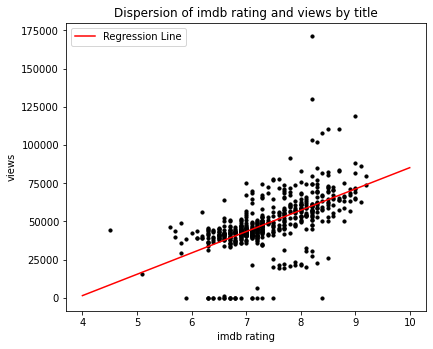

In [39]:
#begin figure
fig = plt.figure(figsize = (5,4))
#begin axis
eixo = fig.add_axes([0,0,1,1])
#scatter plot
eixo.scatter(df1['imdb_rating'],df1['views_title'], color = 'black',s = 10)
#xlabel
eixo.set_xlabel('imdb rating')
#ylabel
eixo.set_ylabel('views')
#title
eixo.set_title("Dispersion of imdb rating and views by title")
#regression line
eixo.plot([i for i in range(4,11,1)],[13946.62222778126*i-54267.78413502572 for i in range(4,11,1)], color = 'red')
eixo.legend(['Regression Line'])

In [12]:
#import second database
df2 = pd.read_csv('/content/drive/MyDrive/Simpsons/simpsons_characters.csv')

In [13]:
df2

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN
...,...,...,...,...
6717,5222,Ron Rabinowitz,ron rabinowitz,m
6718,5728,Martha Stewart,martha stewart,f
6719,1770,Officer Goodman,officer goodman,m
6720,1634,Evan Conover,evan conover,m


In [14]:
#number of male characters
df2[df2['gender'] == 'm'].shape[0]

252

In [15]:
#number of female characters
df2[df2['gender'] == 'f'].shape[0]

71

In [16]:
#import third base
df3 = pd.read_csv("/content/drive/MyDrive/Simpsons/simpsons_episodes.csv")
df3

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating
0,10,Homer's Night Out,3/25/90,7G10,1,10,10,30.30,50816.0,7.4
1,12,Krusty Gets Busted,4/29/90,7G12,1,12,12,30.40,62561.0,8.3
2,14,"Bart Gets an ""F""",10/11/90,7F03,2,1,14,33.60,59575.0,8.2
3,17,Two Cars in Every Garage and Three Eyes on Eve...,11/1/90,7F01,2,4,17,26.10,64959.0,8.1
4,19,Dead Putting Society,11/15/90,7F08,2,6,19,25.40,50691.0,8.0
...,...,...,...,...,...,...,...,...,...,...
595,500,At Long Last Leave,2/19/12,PABF07,23,14,500,5.77,45226.0,7.0
596,502,How I Wet Your Mother,3/11/12,PABF08,23,16,502,4.97,44818.0,7.3
597,511,Adventures in Baby-Getting,11/4/12,PABF18,24,3,511,5.65,39687.0,6.9
598,542,Diggs,3/9/14,SABF08,25,12,542,2.69,39292.0,6.4


In [ ]:
#new column that represents a year of original_air_data
df3['year_original_air_date'] = 0

#put the '20' and '19' before of the years
for i in range(len(df3)):

  if df3['original_air_date'][i][-2] == '9' or df3['original_air_date'][i][-2] == '8':
    df3['year_original_air_date'][i] = '19' + df3['original_air_date'][i][-2:]

  else: 
    df3['year_original_air_date'][i] = '20' + df3['original_air_date'][i][-2:]

In [19]:
df3

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,year_original_air_date
0,10,Homer's Night Out,3/25/90,7G10,1,10,10,30.30,50816.0,7.4,1990
1,12,Krusty Gets Busted,4/29/90,7G12,1,12,12,30.40,62561.0,8.3,1990
2,14,"Bart Gets an ""F""",10/11/90,7F03,2,1,14,33.60,59575.0,8.2,1990
3,17,Two Cars in Every Garage and Three Eyes on Eve...,11/1/90,7F01,2,4,17,26.10,64959.0,8.1,1990
4,19,Dead Putting Society,11/15/90,7F08,2,6,19,25.40,50691.0,8.0,1990
...,...,...,...,...,...,...,...,...,...,...,...
595,500,At Long Last Leave,2/19/12,PABF07,23,14,500,5.77,45226.0,7.0,2012
596,502,How I Wet Your Mother,3/11/12,PABF08,23,16,502,4.97,44818.0,7.3,2012
597,511,Adventures in Baby-Getting,11/4/12,PABF18,24,3,511,5.65,39687.0,6.9,2012
598,542,Diggs,3/9/14,SABF08,25,12,542,2.69,39292.0,6.4,2014


In [20]:
#agroup dataframe by year 
df3_mod = df3[['us_viewers_in_millions','views','year_original_air_date']].groupby(by = ['year_original_air_date'], as_index = False).sum()
#classific by year
df3_mod.sort_values(by = ['year_original_air_date'], ascending= True)

,year_original_air_date,us_viewers_in_millions,views
0,1989,26.70,171408.0
1,1990,577.60,1349284.0
2,1991,556.20,1365183.0
3,1992,506.10,1366991.0
4,1993,447.40,1423229.0
5,1994,392.80,1574961.0
6,1995,388.20,1765866.0
7,1996,280.30,1464373.0
8,1997,343.50,1373964.0
9,1998,211.00,928998.0


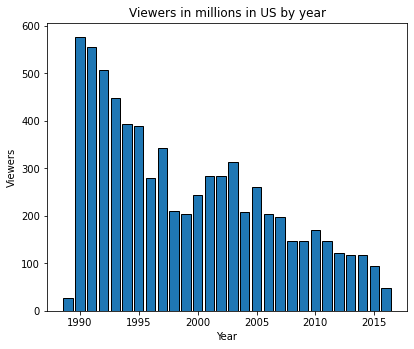

In [22]:
#begin figure 
fig = plt.figure(figsize = (5,4))
#begin axis
eixo = fig.add_axes([0,0,1,1])
#bar plot
eixo.bar(df3_mod['year_original_air_date'],df3_mod['us_viewers_in_millions'], edgecolor = 'black')
#plot title
eixo.set_title('Viewers in millions in US by year')
#x label
eixo.set_xlabel('Year')
# y label
eixo.set_ylabel('Viewers')
#show
fig.show()

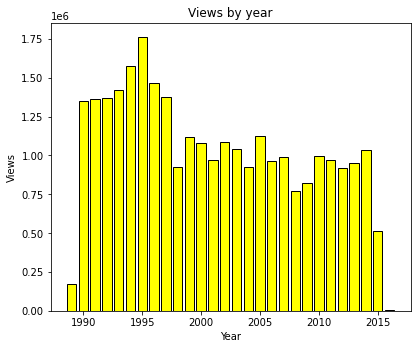

In [23]:
#begin figure 
fig = plt.figure(figsize = (5,4))
#begin axis
eixo = fig.add_axes([0,0,1,1])
#bar plot
eixo.bar(df3_mod['year_original_air_date'],df3_mod['views'], color = 'yellow',edgecolor = 'black')
#plot title
eixo.set_title('Views by year')
#x label
eixo.set_xlabel('Year')
# y label
eixo.set_ylabel('Views')
#show
fig.show()

In [24]:
#agroup dataframe by season
df3_mod = df3[['season','us_viewers_in_millions','views']].groupby(by = ['season'], as_index = False).sum()

In [25]:
df3_mod

,season,us_viewers_in_millions,views
0,1,361.50,947070.0
1,2,536.90,1242693.0
2,3,522.40,1353698.0
3,4,492.70,1424024.0
4,5,416.70,1528816.0
5,6,389.90,1746732.0
6,7,366.50,1691574.0
7,8,321.20,1609532.0
8,9,250.20,758136.0
9,10,200.96,1199953.0


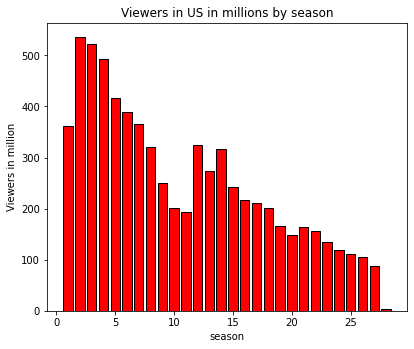

In [26]:
#begin figure
fig = plt.figure(figsize = (5,4))
#begin axes
eixo = fig.add_axes([0,0,1,1])
#bar plot
eixo.bar(df3_mod['season'],df3_mod['us_viewers_in_millions'], color = 'red', edgecolor = 'black')
#title
eixo.set_title('Viewers in US in millions by season')
#x-title
eixo.set_xlabel('season')
#y-title
eixo.set_ylabel('Viewers in million')
#show
fig.show()

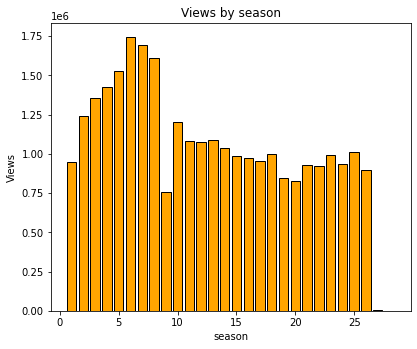

In [27]:
#begin figure
fig = plt.figure(figsize = (5,4))
#begin axes
eixo = fig.add_axes([0,0,1,1])
#bar plot
eixo.bar(df3_mod['season'],df3_mod['views'], color = 'orange', edgecolor = 'black')
#title
eixo.set_title('Views by season')
#x-title
eixo.set_xlabel('season')
#y-title
eixo.set_ylabel('Views')
#show
fig.show()

In [28]:
df3.dtypes

id                          int64
title                      object
original_air_date          object
production_code            object
season                      int64
number_in_season            int64
number_in_series            int64
us_viewers_in_millions    float64
views                     float64
imdb_rating               float64
year_original_air_date      int64
dtype: object

In [29]:
df3['quantity episodes in season'] = 0

df3_mod = df3[['season','quantity episodes in season']].groupby(by = ['season'], as_index = False).count()

Text(0, 0.5, 'Quantity of episodes')

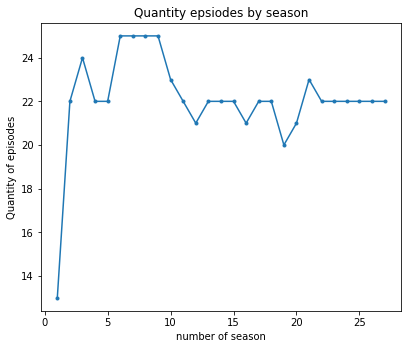

In [30]:
#begin figure
fig = plt.figure(figsize = (5,4))
#begin axes
eixo = fig.add_axes([0,0,1,1])
#plot
eixo.plot(df3_mod['season'][:-1],df3_mod['quantity episodes in season'][:-1],marker = '.')
#title
eixo.set_title('Quantity epsiodes by season')
#xlabel
eixo.set_xlabel('number of season')
#ylabel
eixo.set_ylabel('Quantity of episodes')

In [31]:
quant_eps_por_temp  = list(df3_mod['quantity episodes in season'])

#views 
views = []

#us viewers 
us_viewers = []

#season
for j in range(0,28):

  for i in range(len(df3)):

    if df3['number_in_season'][i] == quant_eps_por_temp[j]:

      views.append(df3['views'][i])
      us_viewers.append(df3['us_viewers_in_millions'][i])




In [32]:
#mean of veiws 
df3['views'].mean()

48759.37751677852

In [33]:
#mean of views first ep in season
df3[df3['number_in_season'] == 1]['views'].mean()

55357.32142857143

In [34]:
#mean of views last ep in season
pd.Series(views).mean()

49343.342307692306

In [35]:
#mean of us_viewers (millions)
df3['us_viewers_in_millions'].mean()

11.842794612794615

In [36]:
#mean of us_viewers first ep in season (millions) 
df3[df3['number_in_season'] == 1]['us_viewers_in_millions'].mean()

13.059642857142856

In [37]:
#mean of us_viewers last ep in season (millions)
pd.Series(us_viewers).mean()

10.16300578034682